 COMPAS analysis project 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the 3 COMPAS csv files 

In [2]:
compas_scores_raw = pd.read_csv('compas-scores-raw.csv')
cox_violent_parsed = pd.read_csv("cox-violent-parsed.csv")
cox_violent_parsed_filt = pd.read_csv('cox-violent-parsed_filt.csv')

viewing the shapes of each dataset 

In [3]:
# print(compas_scores_raw.columns)
# print(compas_scores_raw.info())
print("The shape compas_scores_raw data shape: ", compas_scores_raw.shape)
print ("cox_violent_parsed data shape is: ", cox_violent_parsed.shape)
print ("cox_violent_parsed_filt shape is:  ", cox_violent_parsed_filt.shape)

The shape compas_scores_raw data shape:  (60843, 28)
cox_violent_parsed data shape is:  (18316, 52)
cox_violent_parsed_filt shape is:   (18316, 40)


### From the 3 data csv files cox_violent_parsed_filt and cox_violent_parsed have the same number of rows but different numbers of columns so both data are relatively similar

In [4]:
cox_violent_parsed_filt.columns

Index(['id', 'name', 'first', 'last', 'sex', 'dob', 'age', 'age_cat', 'race',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'violent_recid', 'is_violent_recid',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'priors_count.1', 'event'],
      dtype='object')

In [5]:
cox_violent_parsed.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event'],
      dtype='object')

## So i will toggling from spreedsheet and python during data cleaning
Having said that, importing a copy of data from spreadsheet to clean

importing the files and parseing datetime on columns with dates

In [6]:
df = pd.read_csv("Copy of cox-violent-parsed - cox-violent-parsed.csv",
                parse_dates = ['c_jail_in', 'c_jail_out', 'in_custody', 'out_custody'], dayfirst = True)
df.head()

,name,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,...,decile_score.1,score_text,v_type_of_assessment,v_decile_score,v_score_text,in_custody,out_custody,priors_count.1,start,end
0,miguel hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,...,1,Low,Risk of Violence,1,Low,2014-07-07,2014-07-14,0,0,327
1,miguel hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,...,1,Low,Risk of Violence,1,Low,2014-07-07,2014-07-14,0,334,961
2,michael ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,0,5,0,...,5,Medium,Risk of Violence,2,Low,2014-12-30,2015-01-03,0,3,457
3,kevon dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,0,3,0,...,3,Low,Risk of Violence,1,Low,2013-01-26,2013-02-05,0,9,159
4,ed philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,0,4,0,...,4,Low,Risk of Violence,3,Low,2013-06-16,2013-06-16,4,0,63


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   18316 non-null  object        
 1   compas_screening_date  18316 non-null  object        
 2   sex                    18316 non-null  object        
 3   dob                    18316 non-null  object        
 4   age                    18316 non-null  int64         
 5   age_cat                18316 non-null  object        
 6   race                   18316 non-null  object        
 7   juv_fel_count          18316 non-null  int64         
 8   decile_score           18316 non-null  int64         
 9   juv_misd_count         18316 non-null  int64         
 10  juv_other_count        18316 non-null  int64         
 11  priors_count           18316 non-null  int64         
 12  c_jail_in              17019 non-null  datetime64[ns]
 13  c

#### creating a new column that has the number of days spent in jail by checking the differences

In [8]:
# creating new column named "jail_time"
# jail time is  the number of days spent in jail.
# formula: c_jail_out - c_jail_in

df["jail_time"] = df.c_jail_out - df.c_jail_in
df.jail_time

0        0 days 23:38:00
1        0 days 23:38:00
2                    NaT
3       10 days 01:51:00
4        1 days 02:04:00
              ...       
18311   10 days 01:28:00
18312    1 days 02:01:00
18313    1 days 04:12:00
18314    1 days 23:03:00
18315    1 days 23:03:00
Name: jail_time, Length: 18316, dtype: timedelta64[ns]

In [9]:
# creating new column named "custody_time"
# jail time is  the number of days spent in jail.
# formula: out_custody - in_custody


df["custody_time"] = df.out_custody - df.in_custody
df.custody_time

0        7 days
1        7 days
2        4 days
3       10 days
4        0 days
          ...  
18311   10 days
18312    1 days
18313    1 days
18314    0 days
18315    0 days
Name: custody_time, Length: 18316, dtype: timedelta64[ns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   name                   18316 non-null  object         
 1   compas_screening_date  18316 non-null  object         
 2   sex                    18316 non-null  object         
 3   dob                    18316 non-null  object         
 4   age                    18316 non-null  int64          
 5   age_cat                18316 non-null  object         
 6   race                   18316 non-null  object         
 7   juv_fel_count          18316 non-null  int64          
 8   decile_score           18316 non-null  int64          
 9   juv_misd_count         18316 non-null  int64          
 10  juv_other_count        18316 non-null  int64          
 11  priors_count           18316 non-null  int64          
 12  c_jail_in              17019 non-null  datetim

## Removing duplicated names (leaving only the first name that appeared in the row

NB: the first name will be left

In [11]:
df_unique_name = df.drop_duplicates(subset = ["name"], keep = "first")
df_unique_name.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10855 entries, 0 to 18314
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   name                   10855 non-null  object         
 1   compas_screening_date  10855 non-null  object         
 2   sex                    10855 non-null  object         
 3   dob                    10855 non-null  object         
 4   age                    10855 non-null  int64          
 5   age_cat                10855 non-null  object         
 6   race                   10855 non-null  object         
 7   juv_fel_count          10855 non-null  int64          
 8   decile_score           10855 non-null  int64          
 9   juv_misd_count         10855 non-null  int64          
 10  juv_other_count        10855 non-null  int64          
 11  priors_count           10855 non-null  int64          
 12  c_jail_in              9781 non-null   datetime64[n

#### "is_ricid" column is a binary column that accepts only  1 or 0. It is observed that "-1" indicates that jail time is missing .

removing the rows that have recid = "-1"

In [12]:
df_unique_name = df_unique_name[df_unique_name['is_recid'] > -1]
df_unique_name.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10207 entries, 0 to 18314
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   name                   10207 non-null  object         
 1   compas_screening_date  10207 non-null  object         
 2   sex                    10207 non-null  object         
 3   dob                    10207 non-null  object         
 4   age                    10207 non-null  int64          
 5   age_cat                10207 non-null  object         
 6   race                   10207 non-null  object         
 7   juv_fel_count          10207 non-null  int64          
 8   decile_score           10207 non-null  int64          
 9   juv_misd_count         10207 non-null  int64          
 10  juv_other_count        10207 non-null  int64          
 11  priors_count           10207 non-null  int64          
 12  c_jail_in              9780 non-null   datetime64[n

#### "decile_score" ranges from 1 to 10. score les than 0 should be removed

In [13]:
# removing decile_score less than 1
df_unique_name = df_unique_name[df_unique_name['decile_score'] > 0]
df_unique_name.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10196 entries, 0 to 18314
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   name                   10196 non-null  object         
 1   compas_screening_date  10196 non-null  object         
 2   sex                    10196 non-null  object         
 3   dob                    10196 non-null  object         
 4   age                    10196 non-null  int64          
 5   age_cat                10196 non-null  object         
 6   race                   10196 non-null  object         
 7   juv_fel_count          10196 non-null  int64          
 8   decile_score           10196 non-null  int64          
 9   juv_misd_count         10196 non-null  int64          
 10  juv_other_count        10196 non-null  int64          
 11  priors_count           10196 non-null  int64          
 12  c_jail_in              9771 non-null   datetime64[n

In [14]:
df_unique_name.head().T

,0,3,4,9,10
name,miguel hernandez,kevon dixon,ed philo,marcu brown,bouthy pierrelouis
compas_screening_date,14/08/2013,27/01/2013,14/04/2013,13/01/2013,26/03/2013
sex,Male,Male,Male,Male,Male
dob,18/04/1947,22/01/1982,14/05/1991,21/01/1993,22/01/1973
age,69,34,24,23,43
age_cat,Greater than 45,25 - 45,Less than 25,Less than 25,25 - 45
race,Other,African-American,African-American,African-American,Other
juv_fel_count,0,0,0,0,0
decile_score,1,3,4,8,1
juv_misd_count,0,0,0,1,0


In [15]:
df_unique_name.columns

Index(['name', 'compas_screening_date', 'sex', 'dob', 'age', 'age_cat', 'race',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'c_jail_in', 'c_jail_out', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_charge_degree',
       'r_days_from_arrest', 'r_charge_desc', 'is_violent_recid',
       'vr_charge_desc', 'type_of_assessment', 'decile_score.1', 'score_text',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'in_custody',
       'out_custody', 'priors_count.1', 'start', 'end', 'jail_time',
       'custody_time'],
      dtype='object')

So basically i will be working with the current unique names dataset.

If there is any special analysis that is to be carried out, then we creat a csv file or form a table with the available data

# EDA

In [16]:
cat = df_unique_name["age_cat"].value_counts()
cat

age_cat
25 - 45            5811
Greater than 45    2264
Less than 25       2121
Name: count, dtype: int64

### From the age category distribution:
#### * 5814 are b/w the age of 25 - 45
#### * 2271 are greater than 45
#### * 2122 are less than 25

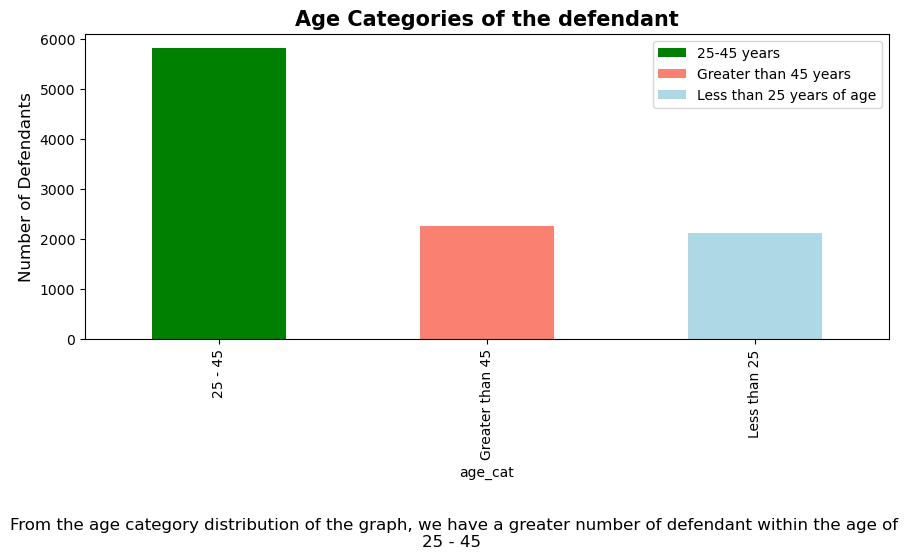

In [17]:
# fig, ax = plt.subplots(figsize = (10, 7))
cat = df_unique_name["age_cat"].value_counts()
# my_cmap = plt.get_cmap("viridis")
bars = cat.plot(kind = "bar", color = ["green", "salmon", "lightblue"], figsize = (9,5))
plt.legend(bars.containers[0],["25-45 years", "Greater than 45 years", "Less than 25 years of age"]) 
plt.title("Age Categories of the defendant", fontsize=15, fontweight='bold')
plt.ylabel('Number of Defendants', fontsize=12)
# Adding text below the graph
plt.figtext(0.5, -0.1, "From the age category distribution of the graph, we have a greater number of defendant within the age of 25 - 45 ", wrap=True, horizontalalignment='center', fontsize=12)

# Adjusting layout to make space for the text
plt.tight_layout()

While using or comparing more than one column, we use pandas function `crosstab`



Counting the sex distribution of the defendants

In [18]:
df_unique_name.sex.value_counts()

sex
Male      8090
Female    2106
Name: count, dtype: int64

In [ ]:
bar = df_unique_name.sex.value_counts().plot(kind = "bar",
                                       color = ["blue", "yellow"])
plt.legend(bar.containers[0], ["Male", "Female"])
plt.title("Sex distribution of defendants", fontsize=15, fontweight='bold')


Text(0.5, 1.0, 'Sex distribution of defendants')

#### Visualizing the Age categories with sex

In [ ]:
bars = pd.crosstab(df_unique_name.age_cat, df_unique_name.sex).plot(kind = "bar", figsize = (9,5))
plt.xlabel("Age Category", fontsize = 15)
plt.title("Gender / Age_Category distribution", fontsize = 15, fontweight = "bold");

for container in bars.containers:
    bars.bar_label(container, fmt='%.2f')

#### vizualizing the race distribution of the defendant

In [ ]:
df_unique_name.race.value_counts()

In [ ]:
df_unique_name.race.unique()

In [ ]:
# Choose a colormap
cmap = plt.get_cmap('tab20c')

categories = df_unique_name.race.unique()
colors = cmap(np.linspace(0, 1, len(categories)))
bar = df_unique_name.race.value_counts().plot(kind = "bar", color = colors, figsize = (9, 5))
plt.legend(bar.containers[0], ['African-American', 'Caucasian', 'Hispanic', 'other', 'Asian', 'Native American'] );
plt.title("Race Distribution of the Defendant", fontsize=15, fontweight='bold')
plt.ylabel("Number of Defendant", fontsize=13)
for container in bar.containers:
    bar.bar_label(container, fmt='%.2f')

# plt.yscale('log')

#### Visualizing the race by sex

In [ ]:
# using crosstab on sex and race columns
pd.crosstab(df_unique_name.sex, df_unique_name.race)

In [ ]:
pd.crosstab(df_unique_name.sex, df_unique_name.race)[:1]

In [ ]:
pd.crosstab(df_unique_name.race, df_unique_name.sex).shape

In [ ]:
c1 = pd.crosstab(df_unique_name.race, df_unique_name.sex).iloc[0:5, [1]]
c1

In [ ]:
# getting the percentage scores on the top of the bar graph
# having getting the sum to be 7638, we divide each value in the male column with sum in order to get the percentage
# creating a new column that have the male precentages
male_sum = c1.Male.sum().sum()
c1["Male_percent"] = (c1.Male/male_sum * 100)


male_sum

In [ ]:
per = list(c1["Male_percent"])
p = []
for i in per:
    p.append(float(i))


In [ ]:
p = [p]
p

In [ ]:
# male race distribution of defendants 
# Choose a colormap
cmap = plt.get_cmap('tab20c')

categories = df_unique_name.race.unique()
colors = cmap(np.linspace(0, 1, len(categories)))
# pd.crosstab(df_unique_name.race, df_unique_name.sex).iloc[0:5, [1]].plot(kind = "bar", color = colors)
# g = pd.crosstab(df_unique_name.race, df_unique_name.sex).iloc[0:5, [1]]

ploting = pd.crosstab(df_unique_name.race, df_unique_name.sex).iloc[0:5, [1]]
bars = ploting.plot(kind = "bar", color = colors)

plt.title(" Male Race Distribution of Defendants", fontsize=15, fontweight='bold')

for container, percentage_column in zip(bars.containers, p):
    bars.bar_label(container, labels=[f'{x:.2f}%' for x in percentage_column ], label_type='edge')

# for container in bars.containers:
    # bars.bar_label(container, fmt='%.2f')

In [ ]:
c2 = pd.crosstab(df_unique_name.race, df_unique_name.sex).iloc[0:5, [0]]
c2

In [ ]:
# getting the percentage scores on the top of the bar graph
# having getting the sum to be 7638, we divide each value in the male column with sum in order to get the percentage
# creating a new column that have the male precentages
female_sum = c2.Female.sum().sum()
c2["female_percent"] = (c2.Female/female_sum * 100)


print ("race Female summation", female_sum)


fer = list(c2["female_percent"])
fe = []
for i in fer:
    fe.append(float(i))


In [ ]:

fe = [fe]
fe

In [ ]:
# female race distribution of defendants 

# Choose a colormap
cmap = plt.get_cmap('tab20c')

categories = df_unique_name.race.unique()
colors = cmap(np.linspace(0, 1, len(categories)))
# pd.crosstab(df_unique_name.race, df_unique_name.sex).iloc[0:5, [1]].plot(kind = "bar", color = colors)
# g = pd.crosstab(df_unique_name.race, df_unique_name.sex).iloc[0:5, [1]]

ploting = pd.crosstab(df_unique_name.race, df_unique_name.sex).iloc[0:5, [0]]
bars = ploting.plot(kind = "bar", color = colors)

plt.title(" Female Race Distribution of Defendants", fontsize=15, fontweight='bold')

for container, percentage_column in zip(bars.containers, fe):
    bars.bar_label(container, labels=[f'{x:.2f}%' for x in percentage_column], label_type='edge')

#### Age_categories and race distribution and gender
#### visualizing what age range does a particular race are defendants and of what particular gender 

In [ ]:
df_unique_name.age_cat.value_counts()

In [ ]:
# plt.scatter(df_unique_name.race, df_unique_name.age, s = df_unique_name.sex)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                      ncols = 2,
                      figsize = (9, 5))

ax1 =(pd.crosstab(df_unique_name.race, df_unique_name.sex).iloc[0:5, [0]])


In [ ]:
df_unique_name.columns

# Decile

#### The Decile score distribution: This Risk score assigned by the COMPAS algorithm, indicating the defendant's perceived risk of recidivism (ranges typically from 1 to 10, with 10 being the highest risk).

In [ ]:
# visualizing the decile score counts
df_unique_name.decile_score.value_counts()

In [ ]:
bars = df_unique_name.decile_score.value_counts().plot(kind = "bar", figsize = (15, 5))
for container in bars.containers:
    bars.bar_label(container, fmt='%.2f')

print("From the graph below, the score with higest frequency is ",1)

#### decile score and race comparision


In [ ]:
bars = pd.crosstab( df_unique_name.decile_score, df_unique_name.race).plot(kind = "bar", figsize = (25, 10))
tab  = pd.crosstab( df_unique_name.decile_score, df_unique_name.race)
for container in bars.containers:
    bars.bar_label(container, fmt='%.2f')

print("From the graph below shows the COMPAS algothirim decile_score with respect to the race")
print("From the graph, African-Americans have the most populated having the highest risk of recidivism.")
print("and it's ratio as comapre to others races over 3: 1")
print("From the graph trend, the race with least risk of recidivism happens to be caucasians, followed by african-american.")
print("But as the risk keeps increasing that is tending towards the highest risk, the number of Afriacn-americans keeps increasing")
tab.head()

In [ ]:
#### since we have crosstab that compares the male and race, let us now plot in target of decile score

In [ ]:
pd.crosstab(df_unique_name.race,df_unique_name.decile_score)


# .iloc[0:5, [1]]


#### Decile_score and the male gender

In [ ]:
# tab = pd.crosstab(df_unique_name.decile_score, df_unique_name.sex).iloc[:, [1]]
tab = pd.crosstab(df_unique_name.decile_score, df_unique_name.sex)
bars = tab.plot(kind = "bar", figsize = (9,5) )

for container in bars.containers:
    bars.bar_label(container, fmt='%.f')

print("check the percentage of each decile socre")

#### Decile_score and the female gender

In [ ]:
tab = pd.crosstab(df_unique_name.decile_score, df_unique_name.sex).iloc[:, [0]]
bars = tab.plot(kind = "barh", figsize = (9,5) )

for container in bars.containers:
    bars.bar_label(container, fmt='%.f')

#### jail_time and race

In [ ]:
df_unique_name.race.value_counts()

### Analyze recidivism and decile score by comapas analysis
`is_recid` column is a binary column where
- 1 = is_recid
- 0 = not recid

In [ ]:
df_unique_name['is_recid'] = df_unique_name['is_recid'].astype(str)
df_unique_name['decile_score'] = df_unique_name['decile_score'].astype(str)

selected_col = df_unique_name[[ 'race', 'is_recid', 'decile_score']]

# Filter the rows where "sex" is "male"
filtered_df = selected_col[selected_col['decile_score'] == 1]
filtered_df = selected_col[selected_col['is_recid'] == "1"]


s = filtered_df[filtered_df["decile_score"] == "1"]
s

In [ ]:
for container in bars.containers:
    print (container)

In [ ]:
# crosstab and normalize to get the percentage
crosstab = pd.crosstab(s.decile_score, s.race, normalize = 'index') * 100

# plot the bar graph
bars = crosstab.plot(kind = "bar", figsize = (9, 6))


plt.title("Race Distribution of race \n decile_score = 1 \n is_recid = 1", fontweight = "bold", fontsize = 10)

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')

In [ ]:
df_unique_name['is_recid'] = df_unique_name['is_recid'].astype(str)
df_unique_name['decile_score'] = df_unique_name['decile_score'].astype(str)

selected_col = df_unique_name[[ 'race', 'is_recid', 'decile_score']]

# Filter the rows where "sex" is "male"
filtered_df = selected_col[selected_col['decile_score'] == 1]
filtered_df = selected_col[selected_col['is_recid'] == "0"]


s = filtered_df[filtered_df["decile_score"] == "1"]
s


In [ ]:
# crosstab and normalize to get the percentage
crosstab = pd.crosstab(s.decile_score, s.race, normalize = 'index') * 100

# plot the bar graph
bars = crosstab.plot(kind = "bar", figsize = (9, 6), width = 0.8)


plt.title("Race Distribution of race \n decile_score = 1 \n is_recid = 0", fontweight = "bold", fontsize = 10)
plt.xlabel("Decile score = 1", fontweight = "bold", fontsize = 13)
plt.ylabel("Percentage %", fontweight = "bold", fontsize = 12)
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')

In [ ]:
df_unique_name['is_recid'] = df_unique_name['is_recid'].astype(str)
df_unique_name['decile_score'] = df_unique_name['decile_score'].astype(str)

selected_col = df_unique_name[[ 'race', 'is_recid', 'decile_score']]

# Filter the rows where "sex" is "male"
filtered_df = selected_col[selected_col['decile_score'] == 10]
filtered_df = selected_col[selected_col['is_recid'] == "1"]


s = filtered_df[filtered_df["decile_score"] == "10"]
s


In [ ]:
# crosstab and normalize to get the percentage
crosstab = pd.crosstab(s.decile_score, s.race, normalize = 'index') * 100

# plot the bar graph
bars = crosstab.plot(kind = "bar", figsize = (9, 6), width = 0.8)


plt.title("Race Distribution of race \n decile_score = 10 \n is_recid = 1", fontweight = "bold", fontsize = 10)
plt.xlabel("Decile score = 1", fontweight = "bold", fontsize = 13)
plt.ylabel("Percentage %", fontweight = "bold", fontsize = 12)
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')

In [ ]:
bars = pd.crosstab(df_unique_name.decile_score, df_unique_name.is_recid).plot(kind = "bar", figsize = (15,5))
for container in bars.containers:
    bars.bar_label(container, fmt='%.f')

print ("despite a decile score of 1 being the lowest, yet we have defendants that have 'is_recid' score of 1")

### checking the race that have `is_racile` score of 1 

In [ ]:
bars = pd.crosstab(df_unique_name.race, df_unique_name.is_recid).plot(kind = "bar", color = ["blue", "yellow"],
                                                              figsize = (9,5))

plt.xlabel("Race", fontsize=15, fontweight='bold')
plt.ylabel("Number of defendants", fontsize=15, fontweight='bold')
plt.title("Recidivism and race distribution", fontsize=25, fontweight='bold')

for container in bars.containers:
    bars.bar_label(container, fmt='%.f')

In [ ]:
pd.crosstab(df_unique_name.race, df_unique_name.is_recid)

In [ ]:
b = pd.crosstab(df_unique_name.race, df_unique_name.sex).iloc[0:5, [1]]
b

### Analyzing a count plot to show the distribution of `race` for `males` compared to `is_recid`

In [ ]:
df_unique_name['is_recid'] = df['is_recid'].astype(str)

selected_col = df_unique_name[['sex', 'race', 'is_recid']]

# Filter the rows where "sex" is "male"
filtered_df = selected_col[selected_col['sex'] == 'Male']

filtered_df

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Create a count plot
bars = sns.countplot(data=filtered_df, x='race', hue='is_recid');
plt.title("Distribution of race for males compared to is_recid", fontsize = 15, fontweight = "bold")
plt.xlabel("Race", fontweight = "bold")
plt.ylabel("Count", fontweight = "bold")
plt.xticks(fontstyle='italic')
for container in bars.containers:
    bars.bar_label(container, fmt='%.f')

### Analyzing a count plot to show the distribution of `race` for `females` compared to `is_recid`

In [ ]:
df_unique_name['is_recid'] = df['is_recid'].astype(str)

selected_col = df_unique_name[['sex', 'race', 'is_recid']]

# Filter the rows where "sex" is "male"
filtered_df = selected_col[selected_col['sex'] == 'Female']

filtered_df

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Create a count plot
bars = sns.countplot(data=filtered_df, x='race', hue='is_recid');
plt.title("Distribution of race for Females compared to is_recid", fontsize = 15, fontweight = "bold")
plt.xlabel("Race", fontweight = "bold")
plt.ylabel("Count", fontweight = "bold")
plt.xticks(fontstyle='italic')
for container in bars.containers:
    bars.bar_label(container, fmt='%.f')

### filtering `male` that are `is_recid = 1` to know their `decile_score` and `race`

In [ ]:
sorted_decile = sorted(df_unique_name['decile_score'].unique())
sorted_decile = list(map(str, sorted_decile))
sorted_decile

In [ ]:
# sdafsg
# sorted_decile = sorted(df_unique_name['decile_score'].unique().astype(str))


df_unique_name['is_recid'] = df_unique_name['is_recid'].astype(str)
df_unique_name['decile_score'] = df_unique_name['decile_score'].astype(str)

selected_col = df_unique_name[['sex', 'race', 'is_recid', 'decile_score']]

# Filter the rows where "sex" is "male"
filtered_df = selected_col[selected_col['sex'] == 'Male']
filtered_df = selected_col[selected_col['is_recid'] == "1"]


filtered_df

In [ ]:
 sorted_decile


In [ ]:
plt.figure(figsize=(20, 6))
# Determine the unique values in 'decile_score' and sort them
# sorted_decile = sorted(df_unique_name['decile_score'].unique())

# Create a count plot with "race" on x-axis and hue as "is_recid"
bars = sns.countplot(data=filtered_df, x='decile_score', hue='race', order = sorted_decile )

# Make x-axis labels italic
plt.xticks(fontstyle='italic')

# Set plot title and labels
plt.title('Distribution of Race for Males that are analyzed by COMPAS to have recidivism as Compared to decile_score \n Note: sex = "male"\n is_recid = 1', 
         fontweight = "bold", fontsize = 20)
plt.xlabel('Decile_score', fontweight = "bold", 
           fontsize = 20
          )
plt.ylabel('Count', fontweight = "bold" ,fontsize = 15)

for container in bars.containers:
    bars.bar_label(container, fmt='%.f')

print("Despite having a lower decile score from the range of 1 to 4, African American male defendants were analyzed to be recidivated")

### filtering `male` that are `is_recid = 0` to know their `decile_score` and `race`

In [ ]:
df_unique_name['is_recid'] = df_unique_name['is_recid'].astype(str)
df_unique_name['decile_score'] = df_unique_name['decile_score'].astype(str)

selected_col = df_unique_name[['sex', 'race', 'is_recid', 'decile_score']]

# Filter the rows where "sex" is "male"
filtered_df = selected_col[selected_col['sex'] == 'Male']
filtered_df = selected_col[selected_col['is_recid'] == "0"]


filtered_df

### get back to the next cell below when you are done creating the plots

In [ ]:
# pd.crosstab(filtered_df.decile_score, filtered_df.race).plot(kind = "bar", figsize = (20, 5))

In [ ]:
plt.figure(figsize=(20, 6))
# Determine the unique values in 'decile_score' and sort them
# sorted_decile = sorted(filtered_df['decile_score'].unique())


# Create a count plot with "race" on x-axis and hue as "is_recid"
bars = sns.countplot(data=filtered_df, x='decile_score', hue='race', order=sorted_decile)
# df_unique_name.sex.value_counts(
# Make x-axis labels italic
plt.xticks(fontstyle='italic')

# Set plot title and labels
plt.title('Distribution of Race for Males that are analyzed by COMPAS to have recidivism as Compared to decile_score \n Note: sex = "male"\n is_recid = 0', 
         fontweight = "bold", fontsize = 20)
plt.xlabel('Decile_score', fontweight = "bold", 
           fontsize = 20
          )
plt.ylabel('Count', fontweight = "bold" ,fontsize = 15)

for container in bars.containers:
    bars.bar_label(container, fmt='%.f')

# print("Despite having a lower decile score from the range of 1 to 4, African American male defendants were analyzed to be recidivated")